## **`Decision Tree`**

In [1]:
import pandas as pd
df = pd.read_csv("../DATASETS/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop("salary_more_then_100k", axis="columns")
target = df["salary_more_then_100k"]

In [3]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs["n_company"] = le_company.fit_transform(inputs["company"])
inputs["n_job"] = le_job.fit_transform(inputs["job"])
inputs["n_degree"] = le_degree.fit_transform(inputs["degree"])

In [8]:
inputs.head()

,company,job,degree,n_company,n_job,n_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [9]:
inputs_n = inputs.drop(["company", "job", "degree"], axis="columns")
merged_inputs = pd.concat([inputs_n,target],axis="columns")
merged_inputs

,n_company,n_job,n_degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [10]:
merged_inputs = merged_inputs.drop(["n_degree"], axis = "columns")
merged_inputs

,n_company,n_job,salary_more_then_100k
0,2,2,0
1,2,2,0
2,2,0,1
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,0
7,0,1,0
8,0,0,0
9,0,0,1


`Trainning the model`

In [11]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [12]:
X = inputs_n
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [15]:
model.score(X_test,y_test)

0.75

✅ 1. Visualize the tree using plot_tree()

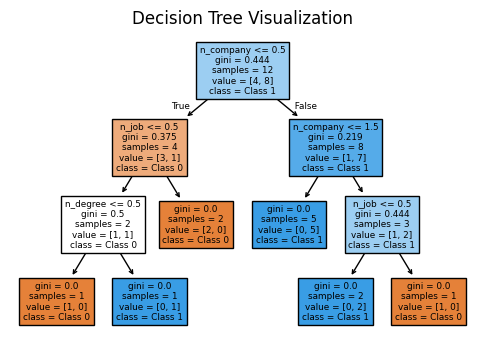

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.show()

✅ 2. Try `entropy` vs `gini` for criterion and compare


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Gini model
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model_gini.fit(X_train, y_train)

# Entropy model
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model_entropy.fit(X_train, y_train)

# Compare accuracy
print("Gini Accuracy:", model_gini.score(X_test, y_test))
print("Entropy Accuracy:", model_entropy.score(X_test, y_test))


Gini Accuracy: 0.75
Entropy Accuracy: 0.75


✅ 3. Play with `max_depth` and `min_samples_split`


In [19]:
# Loop over different hyperparameters
for depth in [2, 4, 6, 8]:
    model = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"max_depth={depth} → Test Accuracy: {score:.2f}")


max_depth=2 → Test Accuracy: 0.50
max_depth=4 → Test Accuracy: 0.75
max_depth=6 → Test Accuracy: 0.75
max_depth=8 → Test Accuracy: 0.75


✅ 4. Plot decision boundaries using matplotlib


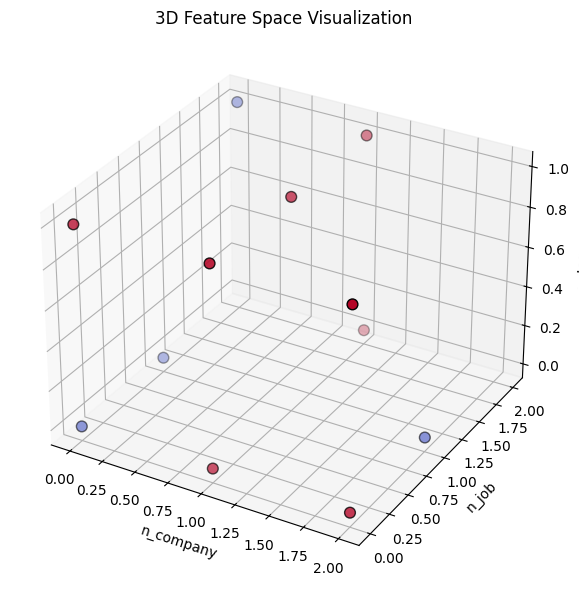

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Ensure your dataset has exactly 3 features
X_3f = X_train.iloc[:, :3]  # replace with specific columns if needed
y_3f = y_train

# Fit model on 3 features
model_3f = DecisionTreeClassifier(max_depth=3, random_state=42)
model_3f.fit(X_3f, y_3f)

# 3D Scatter Plot (decision surface approximation)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X_3f.iloc[:, 0], X_3f.iloc[:, 1], X_3f.iloc[:, 2], 
           c=y_3f, cmap='coolwarm', edgecolor='k', s=60)

ax.set_xlabel(X_3f.columns[0])
ax.set_ylabel(X_3f.columns[1])
ax.set_zlabel(X_3f.columns[2])
ax.set_title("3D Feature Space Visualization")

plt.tight_layout()
plt.show()


**`Saving the model`**

In [23]:
import joblib

# Save model
joblib.dump(model, "../05-Models/decision_tree_model.joblib")

# To load again later:
# model = joblib.load("decision_tree_model.joblib")


['../05-Models/decision_tree_model.joblib']